In [1]:
import pandas as pd 
medical_dataset=pd.read_csv('medical_data.csv')
medical_dataset.head()

,fever,cough,tiredness,headache,stuffy nose,runny nose,sneezing,sore throat,diagnosis
0,1,1,1,0,0,0,0,0,covid19
1,0,1,1,1,0,0,0,0,covid19
2,1,1,1,0,0,0,0,0,covid19
3,1,1,1,0,0,0,0,0,covid19
4,1,1,1,0,0,0,0,0,covid19


In [8]:
from sklearn.tree import DecisionTreeClassifier
def diagnose_v4(train_dataset:pd.DataFrame):
    model=DecisionTreeClassifier(random_state=1)
    train_patient_symptoms=train_dataset.drop(columns=['diagnosis'])
    train_diagnoses=train_dataset['diagnosis']
    model.fit(train_patient_symptoms, train_diagnoses)
    return model

In [9]:
from sklearn.model_selection import train_test_split 
train_data, test_data = train_test_split(medical_dataset, test_size=0.3, random_state=1)
#print the shapes (rows x columns) of the two datasets
print(train_data.shape)
print(test_data.shape)

(1400, 9)
(600, 9)


['allergies' 'common cold' 'covid19' 'flu']


[Text(0.5, 0.875, 'fever <= 0.5\ngini = 0.75\nsamples = 1400\nvalue = [354, 345, 358, 343]'),
 Text(0.25, 0.625, 'sore throat <= 0.5\ngini = 0.606\nsamples = 791\nvalue = [354, 340, 71, 26]'),
 Text(0.125, 0.375, 'runny nose <= 0.5\ngini = 0.497\nsamples = 526\nvalue = [354, 101, 58, 13]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'tiredness <= 0.5\ngini = 0.182\nsamples = 265\nvalue = [0, 239, 13, 13]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'sore throat <= 0.5\ngini = 0.507\nsamples = 609\nvalue = [0, 5, 287, 317]'),
 Text(0.625, 0.375, 'sneezing <= 0.5\ngini = 0.387\nsamples = 317\nvalue = [0, 2, 235, 80]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'headache <= 0.5\ngini = 0.309\nsamples = 292\nvalue = [0, 3, 52, 237]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

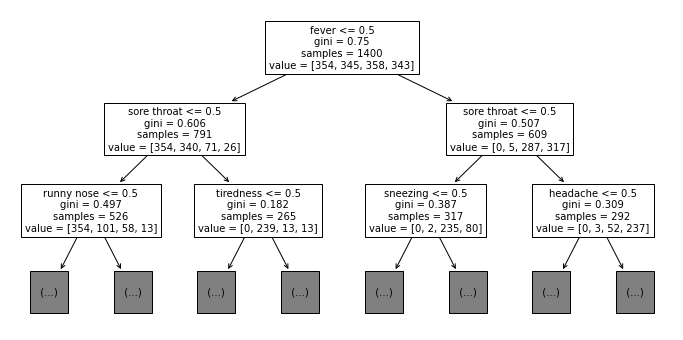

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
my_tree=diagnose_v4(train_data) # train a model
print(my_tree.classes_) # print the possible target labels (diagnoses)
plt.figure(figsize=(12,6)) # size of the visualization, in inches
# plot the tree
plot_tree(my_tree,
          max_depth=2,
          fontsize=10,
          feature_names=medical_dataset.columns[:-1]
)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
test_patient_symptoms=test_data.drop(columns=['diagnosis']) 
test_diagnoses=test_data['diagnosis']
pred=my_tree.predict(test_patient_symptoms)
accuracy_score(test_diagnoses,pred)

0.8166666666666667